In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os


%matplotlib inline

# Data Exploration

In [2]:
data0 = pd.read_csv('Mall_Customers.csv')

In [3]:
data0.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data0.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data1 = data0.rename(index=str, columns={'Annual Income (k$)': 'Annual_Income',
                            'Spending Score (1-100)': 'Spending_Score'})

In [7]:
data1['Annual_Income'] = data1['Annual_Income']*1000

In [8]:
data1.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


# Visualization

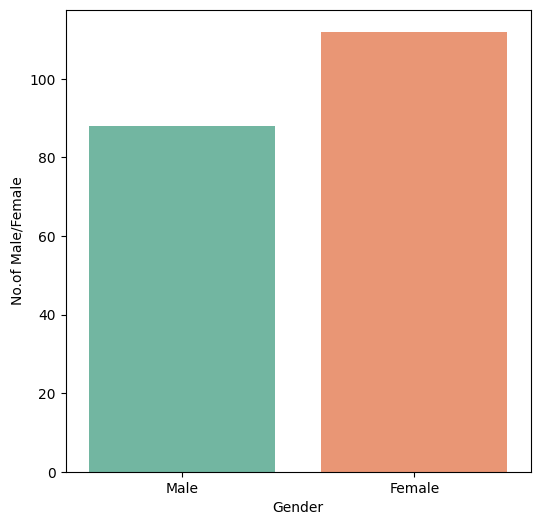

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'Gender', data = data1, palette = 'Set2')
plt.ylabel('No.of Male/Female')
plt.show()

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

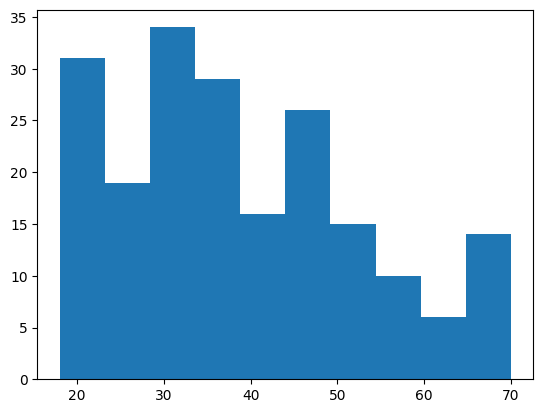

In [10]:
plt.hist(data1['Age'])

C:\Users\divya\AppData\Local\Temp\ipykernel_13816\113485665.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Age'], kde = True, fit = scipy.stats.norm)


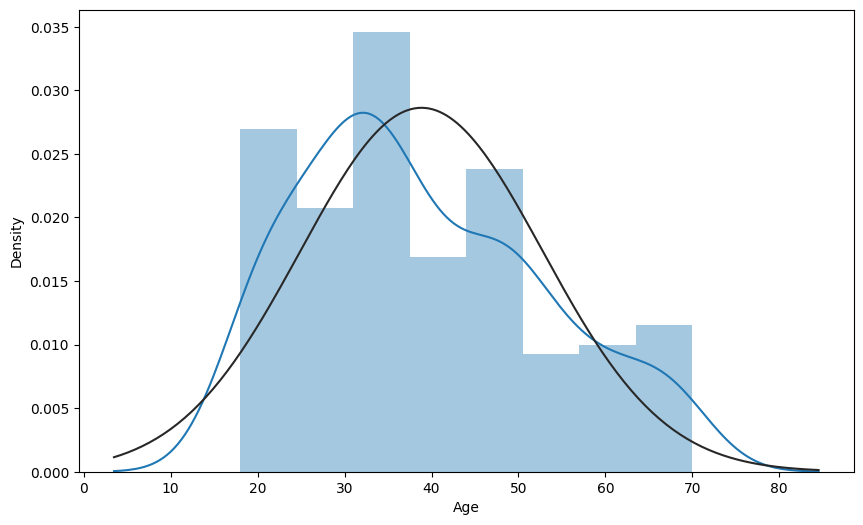

In [11]:
plt.figure(figsize = (10,6))
sns.distplot(data1['Age'], kde = True, fit = scipy.stats.norm)
plt.xlabel('Age')
plt.show()

In [12]:
data2 = pd.get_dummies(data1)

In [13]:
data2.head()

,CustomerID,Age,Annual_Income,Spending_Score,Gender_Female,Gender_Male
0,1,19,15000,39,0,1
1,2,21,15000,81,0,1
2,3,20,16000,6,1,0
3,4,23,16000,77,1,0
4,5,31,17000,40,1,0


In [14]:
data2 = data2.drop(columns='Gender_Male').rename(columns={'Gender_Female': 'Gender'})

In [38]:
features = data2[['Annual_Income','Spending_Score']].copy()

In [39]:
features

,Annual_Income,Spending_Score
0,15000,39
1,15000,81
2,16000,6
3,16000,77
4,17000,40
...,...,...
195,120000,79
196,126000,28
197,126000,74
198,137000,18


# Feature Transformation

In [40]:
scaler = StandardScaler()
scaler.fit(features)

StandardScaler()

In [41]:
features_scaled = pd.DataFrame(scaler.transform(features), index = features.index, columns = features.columns)

# K-Means Cluster

In [42]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

c:\Users\divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

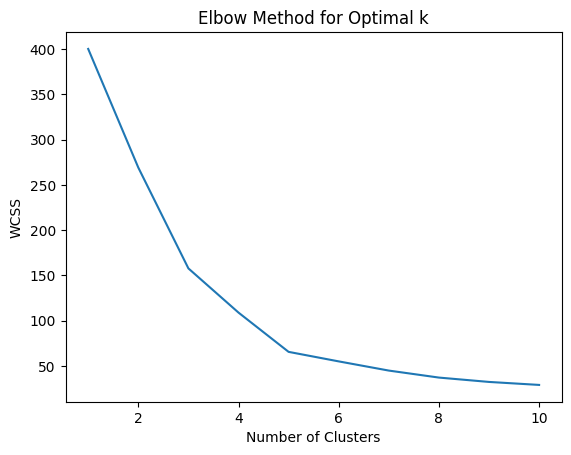

In [43]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

In [44]:
# Based on the elbow graph, choose the optimal number of clusters (k)
optimal_k = 5

In [45]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
features['Cluster'] = kmeans.fit_predict(features_scaled)

c:\Users\divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


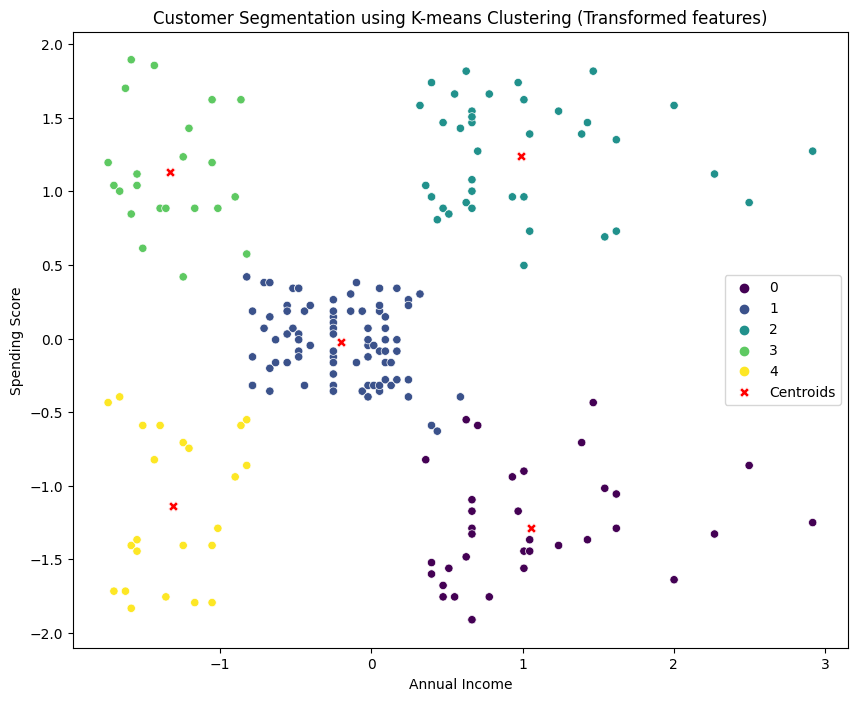

In [46]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=features_scaled['Annual_Income'], y=features_scaled['Spending_Score'], hue=features['Cluster'], palette='viridis')
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s=50, color='red', marker='X', label='Centroids')
plt.title('Customer Segmentation using K-means Clustering (Transformed features)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

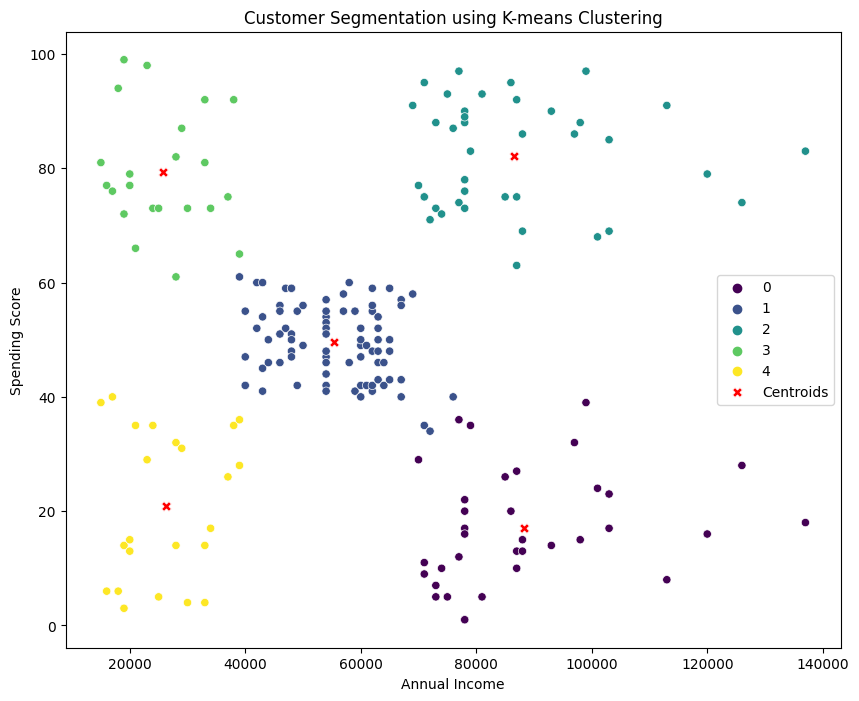

In [28]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=features['Annual_Income'], y=features['Spending_Score'], hue=features['Cluster'], palette='viridis')

# Transform centroids back to original scale
centroids_original_scale = scaler.inverse_transform(kmeans.cluster_centers_)

sns.scatterplot(x=centroids_original_scale[:, 0], y=centroids_original_scale[:, 1],
                s=50, color='red', marker='X', label='Centroids')

plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

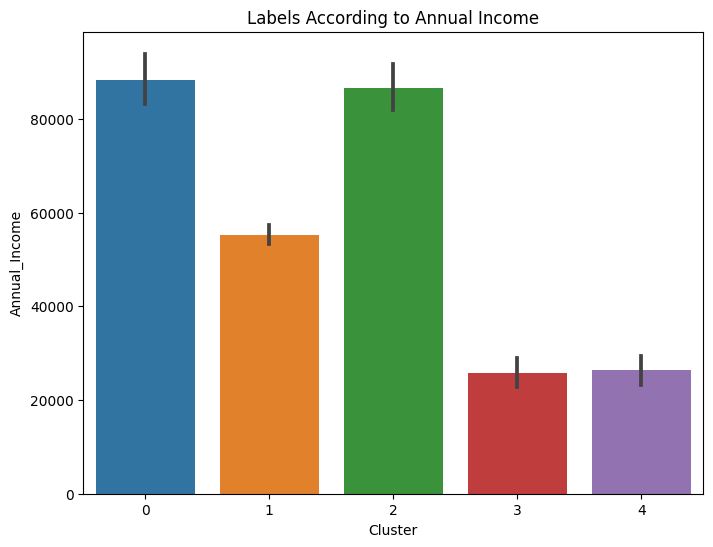

In [47]:
fig, axes = plt.subplots(figsize=(8, 6))
# Bar plot for Annual Income
sns.barplot(x='Cluster', y='Annual_Income', data=features)
axes.set_title('Labels According to Annual Income')

plt.show()

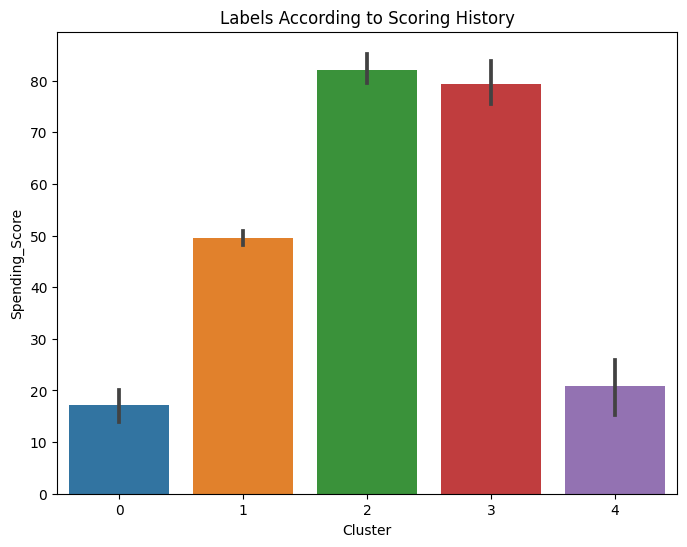

In [49]:
# Bar plot for Scoring History
fig, axes = plt.subplots(figsize=(8, 6))
sns.barplot(x='Cluster', y='Spending_Score', data=features)
axes.set_title('Labels According to Scoring History')
plt.show()

In [50]:
import pickle

# Save the trained model using pickle
model_filename = 'kmeans_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(kmeans, model_file)
print(f"Model saved as {model_filename}")

Model saved as kmeans_model.pkl
